In [1]:
import os
import numpy as np

from run_TUnCaT import run_TUnCaT

# Set the folder for the input and output data

In [2]:
# The folder containing the videos
dir_parent = './data'
# A list of the name of the videos
list_Exp_ID = ['c28_163_244']
# The folder name (excluding the file name) containing the video
dir_video = dir_parent
# The folder name (excluding the file name) containing the neuron masks
dir_masks = dir_parent
# The folder to save the unmixed traces.
dir_traces = os.path.join(dir_parent, 'unmixed_traces')

# Set parameters

In [3]:
# A list of tested alpha.
list_alpha = [1]
# If there are multiple elements in "list_alpha", whether consider them as independent trials.
multi_alpha = True
# False means the largest element providing non-trivial output traces will be used, 
# which can be differnt for different neurons. It must be sorted in ascending order.
# True means each element will be tested and saved independently.
# Traces lower than this quantile are clipped to this quantile value.
Qclip = 0
# The minimum value of the input traces after scaling and shifting. 
epsilon = 0
# Maximum pertentage of unmixed traces equaling to the trace minimum.
th_pertmin = 1
# If th_residual > 0, The redisual of unmixing should be smaller than this value.
th_residual = False
# The temporal downsampling ratio.
nbin = 1
# The method of temporal downsampling. can be 'downsample', 'sum', or 'mean'
bin_option = 'downsample' # 'sum' # 'mean' # 
# Whether a flexible alpha strategy is used 
# when the smallest alpha in "list_alpha" already caused over-regularization.
flexible_alpha = True

# Run TUnCaT on the demo video
The saved processing time is recorded in a laptop with an AMD Ryzen 5 3500U quad-core CPU

In [4]:
for Exp_ID in list_Exp_ID:
    print(Exp_ID)
    # The file path (including file name) of the video.
    filename_video = os.path.join(dir_video, Exp_ID + '.h5')
    # The file path (including file name) of the neuron masks. 
    filename_masks = os.path.join(dir_masks, 'FinalMasks_' + Exp_ID + '.mat')
    
    # run TUnCaT to calculate the unmixed traces of the marked neurons in the video
    run_TUnCaT(Exp_ID, filename_video, filename_masks, dir_traces, list_alpha, Qclip, \
        th_pertmin, epsilon, th_residual, nbin, bin_option, multi_alpha, flexible_alpha)

c28_163_244
Data loading time: 0.06095075607299805 s
Trace calculation time: 0.5977051258087158 s
NMF unmixing time: 32.24381351470947 s


C:\Program Files\Python38\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


# Load the output data (Optional).

In [5]:
from scipy.io import loadmat

dir_trace_raw = os.path.join(dir_traces, "raw")
if len(list_alpha) > 1:
    dir_trace_unmix = os.path.join(dir_traces, "list_alpha={}".format(str(list_alpha)))
else:
    dir_trace_unmix = os.path.join(dir_traces, "alpha={:6.3f}".format(list_alpha[0]))
raw_mat = loadmat(os.path.join(dir_trace_raw, Exp_ID+".mat"))
traces = raw_mat["traces"]
bgtraces = raw_mat["bgtraces"]
unmix_mat = loadmat(os.path.join(dir_trace_unmix, Exp_ID+".mat"))
traces_nmfdemix = unmix_mat["traces_nmfdemix"]

# Plot the mixed and unmixed trace of the first neuron (Optional, but requires matplotlib to run).

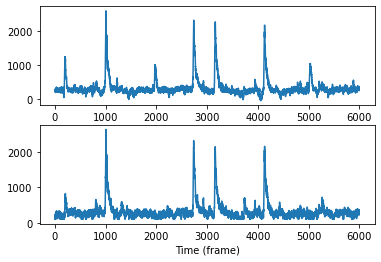

In [6]:
import matplotlib.pyplot as plt

nn = 0
plt.figure()
plt.subplot(2,1,1)
plt.plot(traces[:,0] - bgtraces[:,0])
plt.subplot(2,1,2)
plt.plot(traces_nmfdemix[:,0])
plt.xlabel('Time (frame)')
plt.show()